# Data Loading

## Data loading with Pandas
Load `adult` dataset using Pandas.

In [ ]:
import pandas as pd


In [ ]:
df1 = pd.read_csv("adult.csv", index_col = 0)
df1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Simple analysis
- Check the shape of the dataset,
- list the column names count number of unique values in `income` column,
- plot the histogram of age grouped by income

In [ ]:
df1.shape

(32561, 14)

In [ ]:
df1.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
df1['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [ ]:
#list the top 10 countries of higher income residents
I = df1.groupby('native-country')['income'].value_counts()
J = I[[i[1] == ' >50K' for i in I.index ]].sort_values(ascending = False)[:10]
top_countries = [j[0] for j in J.index]

In [ ]:
print(top_countries)

[' United-States', ' ?', ' Philippines', ' Germany', ' India', ' Canada', ' Mexico', ' England', ' Italy', ' Cuba']


In [ ]:
df1.groupby('native-country')['income'].value_counts().index

MultiIndex([(                         ' ?', ' <=50K'),
            (                         ' ?',  ' >50K'),
            (                  ' Cambodia', ' <=50K'),
            (                  ' Cambodia',  ' >50K'),
            (                    ' Canada', ' <=50K'),
            (                    ' Canada',  ' >50K'),
            (                     ' China', ' <=50K'),
            (                     ' China',  ' >50K'),
            (                  ' Columbia', ' <=50K'),
            (                  ' Columbia',  ' >50K'),
            (                      ' Cuba', ' <=50K'),
            (                      ' Cuba',  ' >50K'),
            (        ' Dominican-Republic', ' <=50K'),
            (        ' Dominican-Republic',  ' >50K'),
            (                   ' Ecuador', ' <=50K'),
            (                   ' Ecuador',  ' >50K'),
            (               ' El-Salvador', ' <=50K'),
            (               ' El-Salvador',  ' >50K'),
          

In [ ]:
df1.groupby('native-country')['income'].apply(lambda x: (x == ' >50K').sum()).sort_values(ascending=False).head(10)

,income
native-country,
United-States,7171
?,146
Philippines,61
Germany,44
India,40
Canada,39
Mexico,33
England,30
Italy,25


In [ ]:
df1.groupby('native-country')['income'].value_counts().index[1][1]

' >50K'

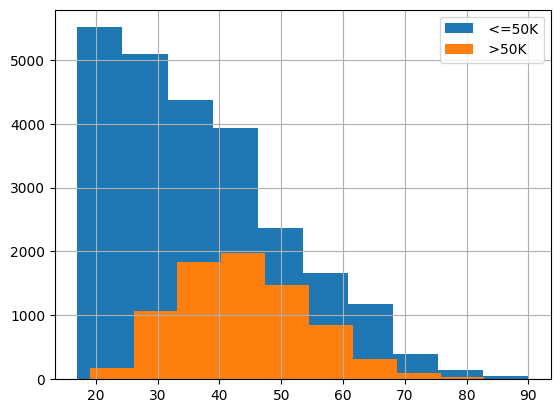

In [ ]:
df1.groupby('income').age.hist(legend = True);

# Splitting into training and test data

# Exercise I
Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [ ]:
#X:feature (attribute or characteristics set, or the data about the subjects)

In [ ]:
df1.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
# y: is the target variable that you want to predict
# you will catch the patterns in x that  give you y
'''
to train a ML model, we will divide our data into train and test datasets
I will use train dataset to train, and test dataset to test the predictive power of the model
'''

In [ ]:
df2 = pd.read_csv("boston_house_prices.csv")
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df2.shape

(506, 14)

In [ ]:
y = df2['MEDV']
X = df2.drop('MEDV', axis = 1)

Text(0.5, 0, 'CRIM')

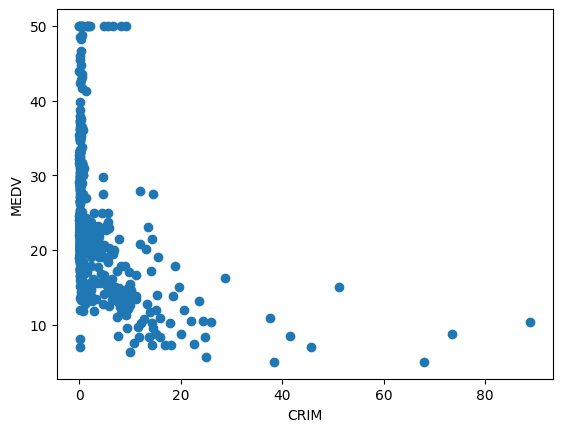

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df2['CRIM'], df2['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('CRIM')

Text(0.5, 0, 'RM')

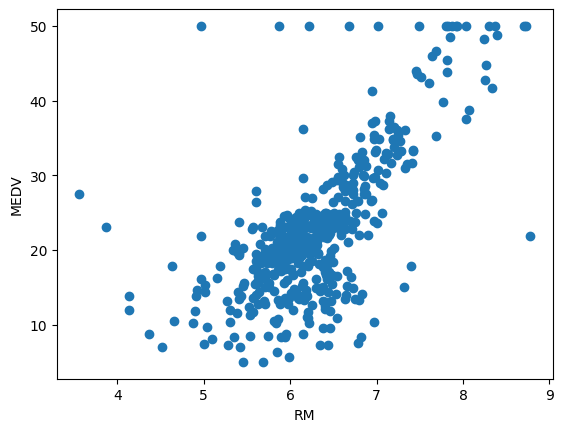

In [ ]:
plt.scatter(df2['RM'], df2['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('RM')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size = 0.2)


In [ ]:
df2[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
x_train.shape

(404, 13)

In [ ]:
X.shape

(506, 13)

In [ ]:
100*x_train.shape[0]/X.shape[0]

79.84189723320158

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)
#lr.scope
#lr.predict

LinearRegression()

In [ ]:
lr.score(x_train, y_train)

0.7499718806604991

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_train_hat = lr.predict(x_train)

In [ ]:
mean_squared_error(y_train, y_train_hat)

20.10617855978809

In [ ]:
y_train.shape[0]

404

In [ ]:
def mse(y, yhat):
  n= y.shape[0]
  se = (y-yhat)**2
  return se.sum()/n


In [ ]:
mse(y_train, y_train_hat)

20.10617855978809

In [ ]:
lr.predict(x_train);

In [ ]:
lr.score(x_test, y_test)

0.6810759901158613

In [ ]:
type(x_test)

pandas.core.frame.DataFrame

In [ ]:
import numpy as np
Xnew= x_test.iloc[0,:]
Xnew.shape
Xnew = np.array(Xnew).reshape(1,Xnew.shape[0])
Xnew

array([[1.4150e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01,
        6.1690e+00, 6.6000e+00, 5.7209e+00, 3.0000e+00, 2.3300e+02,
        1.7900e+01, 3.8337e+02, 5.8100e+00]])

In [ ]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
lr.predict(Xnew)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.96819467])

In [ ]:
y_train

,MEDV
492,20.1
157,41.3
312,19.4
271,25.2
113,18.7
...,...
386,10.5
237,31.5
483,21.8
469,20.1


In [ ]:
lr.predict(x_test)

array([25.96819467, -3.41056326,  5.91638061, 21.09620235, 30.53764443,
       33.20155938, 14.2372272 , 18.04739971, 24.38096047, 12.52330935,
       28.50912806, 25.02465211, 22.9374249 , 21.35928752, 36.37187408,
       26.95800144, 35.24945248, 24.74824359, 25.06516779, 24.51004808,
       20.55576226, 17.50103186, 21.49801785, 19.2540012 , 37.85077875,
       17.58682999, 27.21261354, 29.02281845, 20.60014716, 16.42196722,
       24.83475474, 17.07564261, 18.75450053, 14.81652658, 23.47461783,
       22.41670793, 32.89223801, 34.44602313, 34.76826487, 17.28215032,
       31.64049282, 24.36470535, 31.03434153, 12.9376662 , 13.30105739,
        8.32201976, 19.70165519, 24.87794017, 21.94568542, 41.80710827,
       11.05068528, 20.21510095, 14.02152197, 25.71477223, 14.40518482,
       28.49871407, 13.58925525, 20.56372427, 40.43603938, 21.67461667,
       26.41016501, 23.64379548, 35.44073501, 17.22057372, 39.75642227,
       22.06289122, 28.0547081 , 30.27344021, 16.77660635, 27.04